In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [2]:
#Loading CSV file
data = pd.read_csv('C:\\Users\\Vivek\\Documents\\Data Science\\Class-EDA\\IPL\\matches.csv')
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (636, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data['dl_applied'].value_counts()

0    620
1     16
Name: dl_applied, dtype: int64

In [3]:
# data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [4]:
# calculate missing value count per column
data.shape[0] - data.count()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
#Checking rows where column city is null or blank
data[data['city'].isnull()]

# have googled these 7 matches and found out that those 7 matches held in Dubai, outside India

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [6]:
#Checking rows where column winner is null or blank
data[data['winner'].isnull()]

# have googled these 3 matches and found out that those matches were stopped due to rain..

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [7]:
#Checking rows where column player_of_match is null or blank
data[data['player_of_match'].isnull()]

# have googled these 3 matches and found out that those matches were stopped due to rain..

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [8]:
#Checking rows where column player_of_match is null or blank
data[data['umpire1'].isnull()]

# have googled these 3 matches and found out that those matches were stopped due to rain..

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# Googled the umpire name for this match, now updating those in table
data.loc[4, 'umpire1'] = 'Sundaram Ravi'
data.loc[4, 'umpire2'] = 'Virender Sharma'

In [10]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,NaN


In [4]:
# check again Null data count
data.shape[0]-data.count()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            636
dtype: int64

In [12]:
# check for duplicate
data.duplicated().value_counts()

#No duplicate rows found

False    636
dtype: int64

In [5]:
# converting date column type from object to datetime
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

In [14]:
#checking outliers
data.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [ ]:
#Pre Profiling
# 1. Checked Mising values 
#    Fixed missing values for Umpire1, Umpire2 
#    Others (City & Winners) we can not do anything
# 2. Check duplicate values - no duplicate found
# 3. Check outliers - based on the describe() output, confirming that there is no outliers available
# 4. Converted column type from object to datetime for column "date"

In [15]:
#post profiling
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

In [ ]:
#EDA
# UNI
# 1. Number of matches played in different cities
# 2. Number of matches played in different grounds
# 3. Number of matches played by each team
# 4. Is winning the toss really an advantage
# 5. Number of Matches won by each teams

# BI

In [16]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,NaN


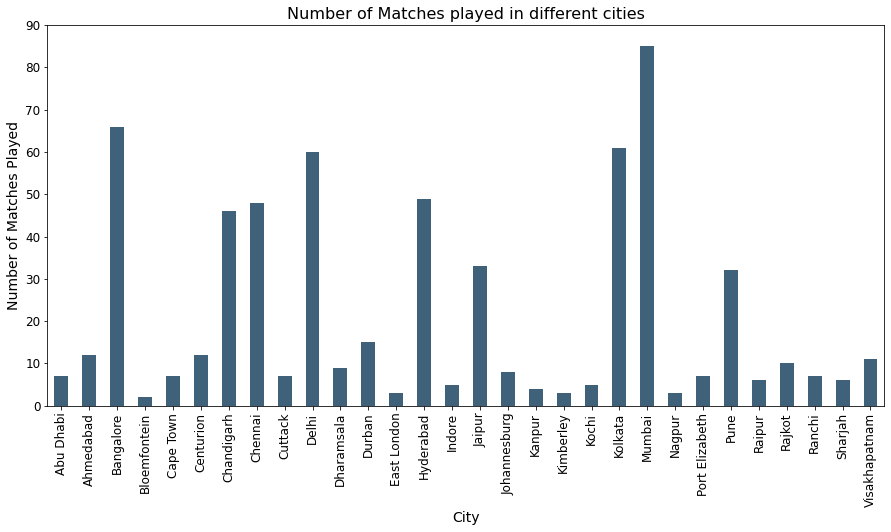

In [17]:
# 1. Number of matches played in different cities

figure = plt.figure(figsize=[15, 7])

data.sort_values(by='city', ascending=True)['city'].value_counts().sort_index().plot.bar(color='#3F617A')
plt.xticks(rotation=90, size=12)
plt.yticks(ticks=np.arange(0, 100, 10), size=12)
plt.xlabel(xlabel='City', size=14)
plt.ylabel(ylabel='Number of Matches Played', size=14)
plt.title(label='Number of Matches played in different cities', size=16)
plt.show()

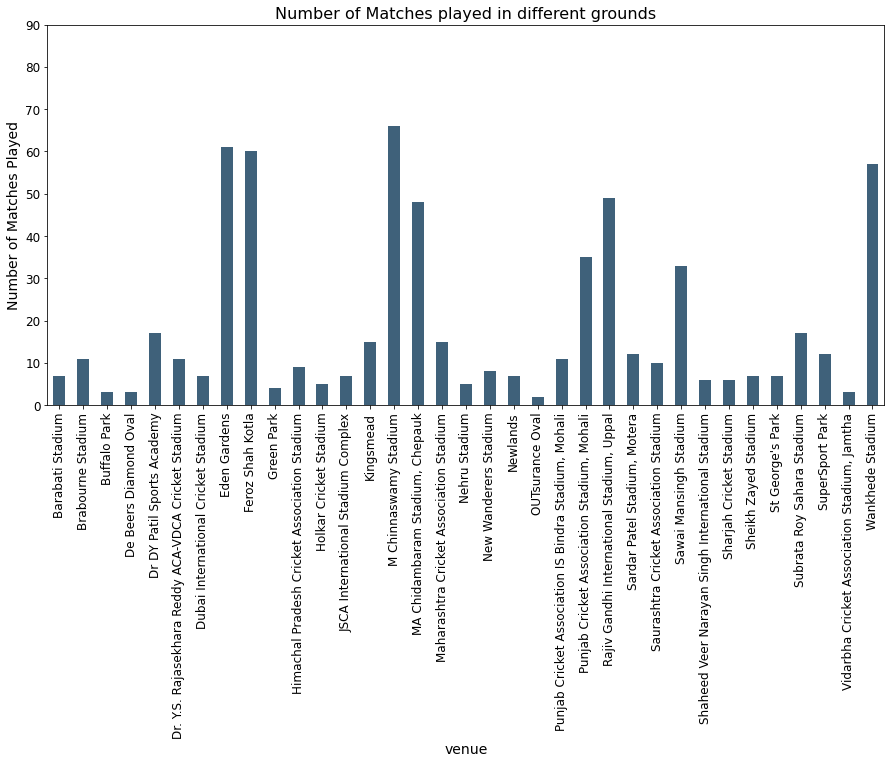

In [20]:
# 2. Number of matches played in different grounds
figure = plt.figure(figsize=[15, 7])

data.sort_values(by='venue', ascending=True)['venue'].value_counts().sort_index().plot.bar(color='#3F617A')
plt.xticks(rotation=90, size=12)
plt.yticks(ticks=np.arange(0, 100, 10), size=12)
plt.xlabel(xlabel='venue', size=14)
plt.ylabel(ylabel='Number of Matches Played', size=14)
plt.title(label='Number of Matches played in different grounds', size=16)
plt.show()

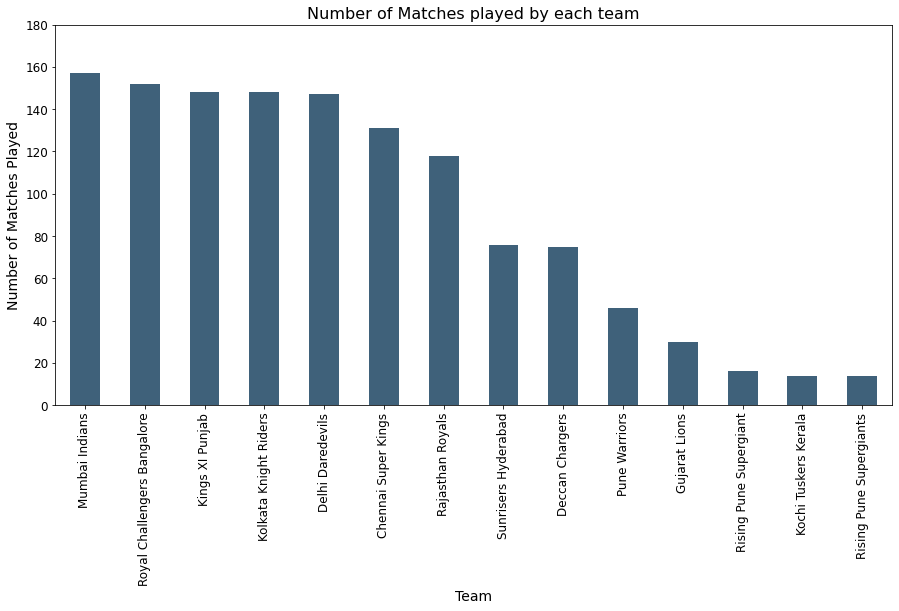

In [21]:
# 3. Number of matches played by each team
data_Matches_as_firstteam = data.groupby(by=['team1'])['id'].count()
data_Matches_as_secondteam = data.groupby(by=['team2'])['id'].count()

data_TotalMatches_Per_Team = data_Matches_as_firstteam + data_Matches_as_secondteam

figure = plt.figure(figsize=[15, 7])
data_TotalMatches_Per_Team.sort_values(ascending=False).plot.bar(color='#3F617A')
plt.xticks(rotation=90, size=12)
plt.yticks(ticks=np.arange(0, 200, 20), size=12)
plt.xlabel(xlabel='Team', size=14)
plt.ylabel(ylabel='Number of Matches Played', size=14)
plt.title(label='Number of Matches played by each team', size=16)
plt.show()


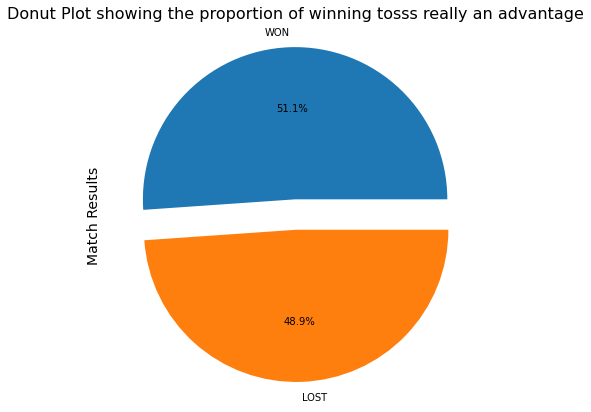

In [34]:
# 4. Is winning the toss really an advantage
#Step to first set the data by adding column which have value as 'WON' if team who won the toss is winner of the same game.
# and value as 'LOST' if the team who is toss winner but not a match winner
data_set2 = data
data_set2['Toss_Winner_Win_Match'] = np.where(data_set2['toss_winner'] == data_set2['winner'], 'WON', 'LOST')

# plot the graph
figure = plt.figure(figsize=[15, 7])
#data_set2['Toss_Winner_Win_Match'].value_counts().plot.bar(color='#3F617A')
#plt.xticks(rotation=90, size=12)
#plt.yticks(ticks=np.arange(0, 500, 50), size=12)
#plt.xlabel(xlabel='Toss', size=14)
#plt.ylabel(ylabel='Number of Matches Won', size=14)
#plt.title(label='Is winning the toss really an advantage', size=16)
#plt.show()
data_set2['Toss_Winner_Win_Match'].value_counts().plot(kind = 'pie', autopct='%3.1f%%',  explode=space)

plt.ylabel(ylabel='Match Results', size=14)
plt.title(label='Donut Plot showing the proportion of winning tosss really an advantage', size=16)
plt.show()

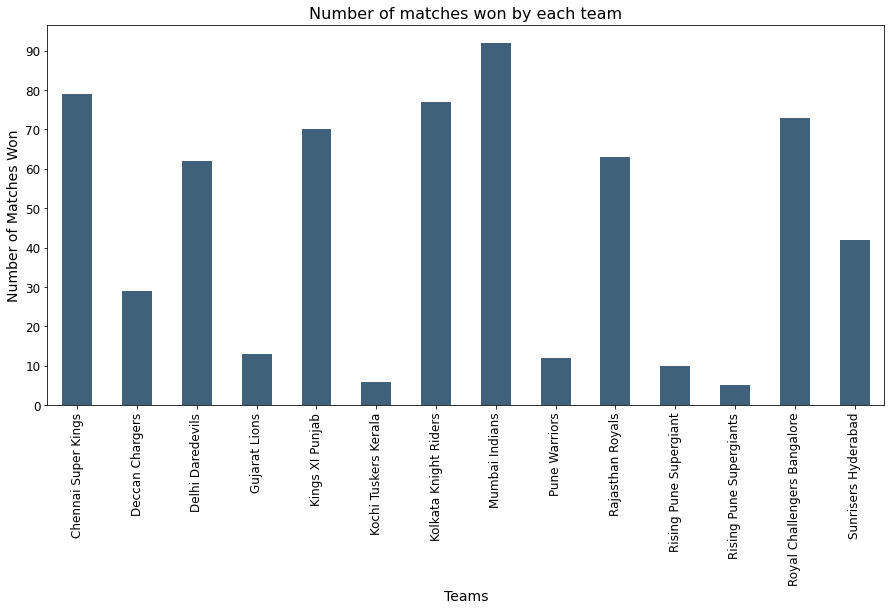

In [141]:
# 5. Number of Matches won by each teams

# plot the graph
figure = plt.figure(figsize=[15, 7])
data['winner'].value_counts().sort_index().plot.bar(color='#3F617A')
plt.xticks(rotation=90, size=12)
plt.yticks(ticks=np.arange(0, 100, 10), size=12)
plt.xlabel(xlabel='Teams', size=14)
plt.ylabel(ylabel='Number of Matches Won', size=14)
plt.title(label='Number of matches won by each team', size=16)
plt.show()

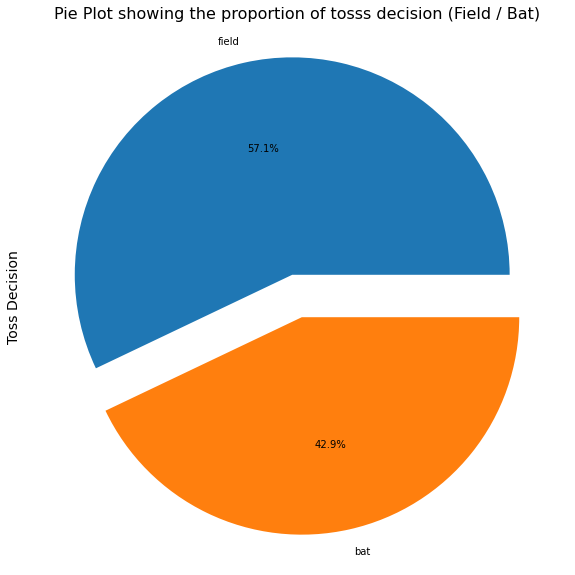

In [48]:
# 6. Tosss decision in Percetage 

# plot the graph

figure = plt.figure(figsize=[10, 10])
space = np.ones(2)/10
data['toss_decision'].value_counts().plot(kind = 'pie', autopct='%3.1f%%',  explode=space)

plt.ylabel(ylabel='Toss Decision', size=14)
plt.title(label='Pie Plot showing the proportion of tosss decision (Field / Bat)', size=16)
plt.show()

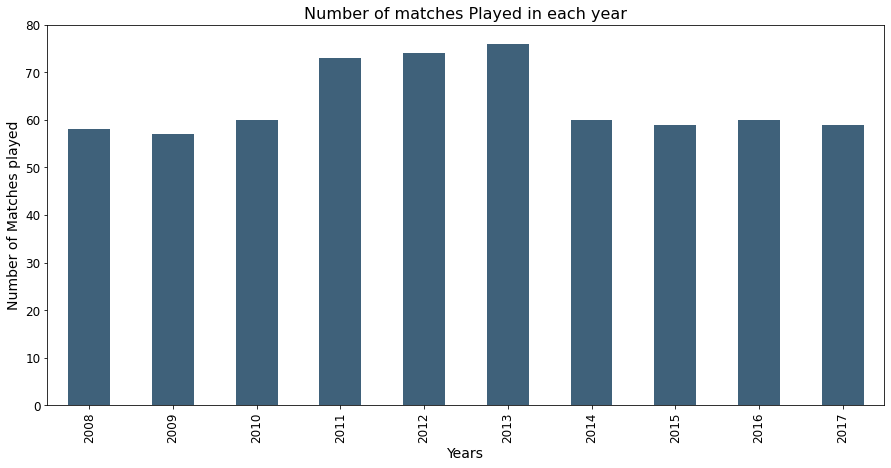

In [44]:
# 7. Total Number of Matches Per season
# plot the graph

figure = plt.figure(figsize=[15, 7])
data['season'].value_counts().sort_index().plot.bar(color='#3F617A')
plt.xticks(rotation=90, size=12)
plt.yticks(ticks=np.arange(0, 90, 10), size=12)
plt.xlabel(xlabel='Years', size=14)
plt.ylabel(ylabel='Number of Matches played', size=14)
plt.title(label='Number of matches Played in each year', size=16)
plt.show()

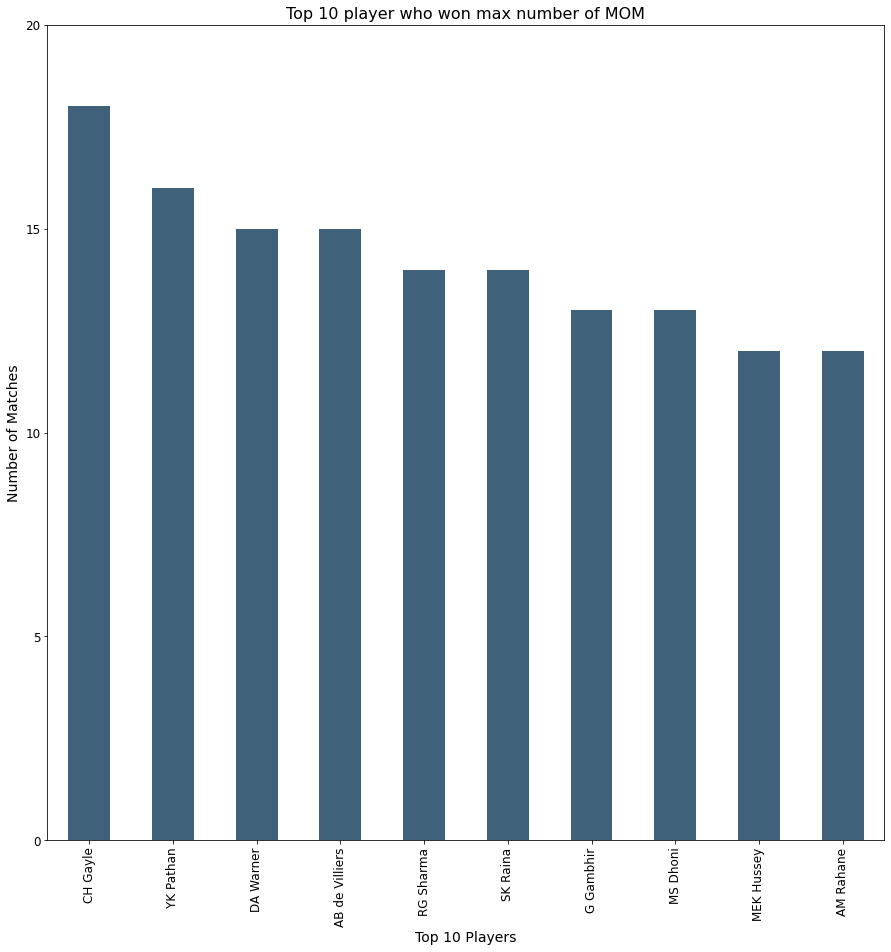

In [62]:
# 8. Top 10 player who won max number of MOM

# plot the graph
figure = plt.figure(figsize=[15, 15])
data['player_of_match'].value_counts().head(10).plot.bar(color='#3F617A')
plt.xticks(rotation=90, size=12)
plt.yticks(ticks=np.arange(0, 26, 3), size=12)
plt.xlabel(xlabel='Top 10 Players', size=14)
plt.ylabel(ylabel='Number of Matches', size=14)
plt.title(label='Top 10 player who won max number of MOM across all seasons', size=16)
plt.show()

Text(0.5, 1.0, 'Top 5 MOM in 2017')

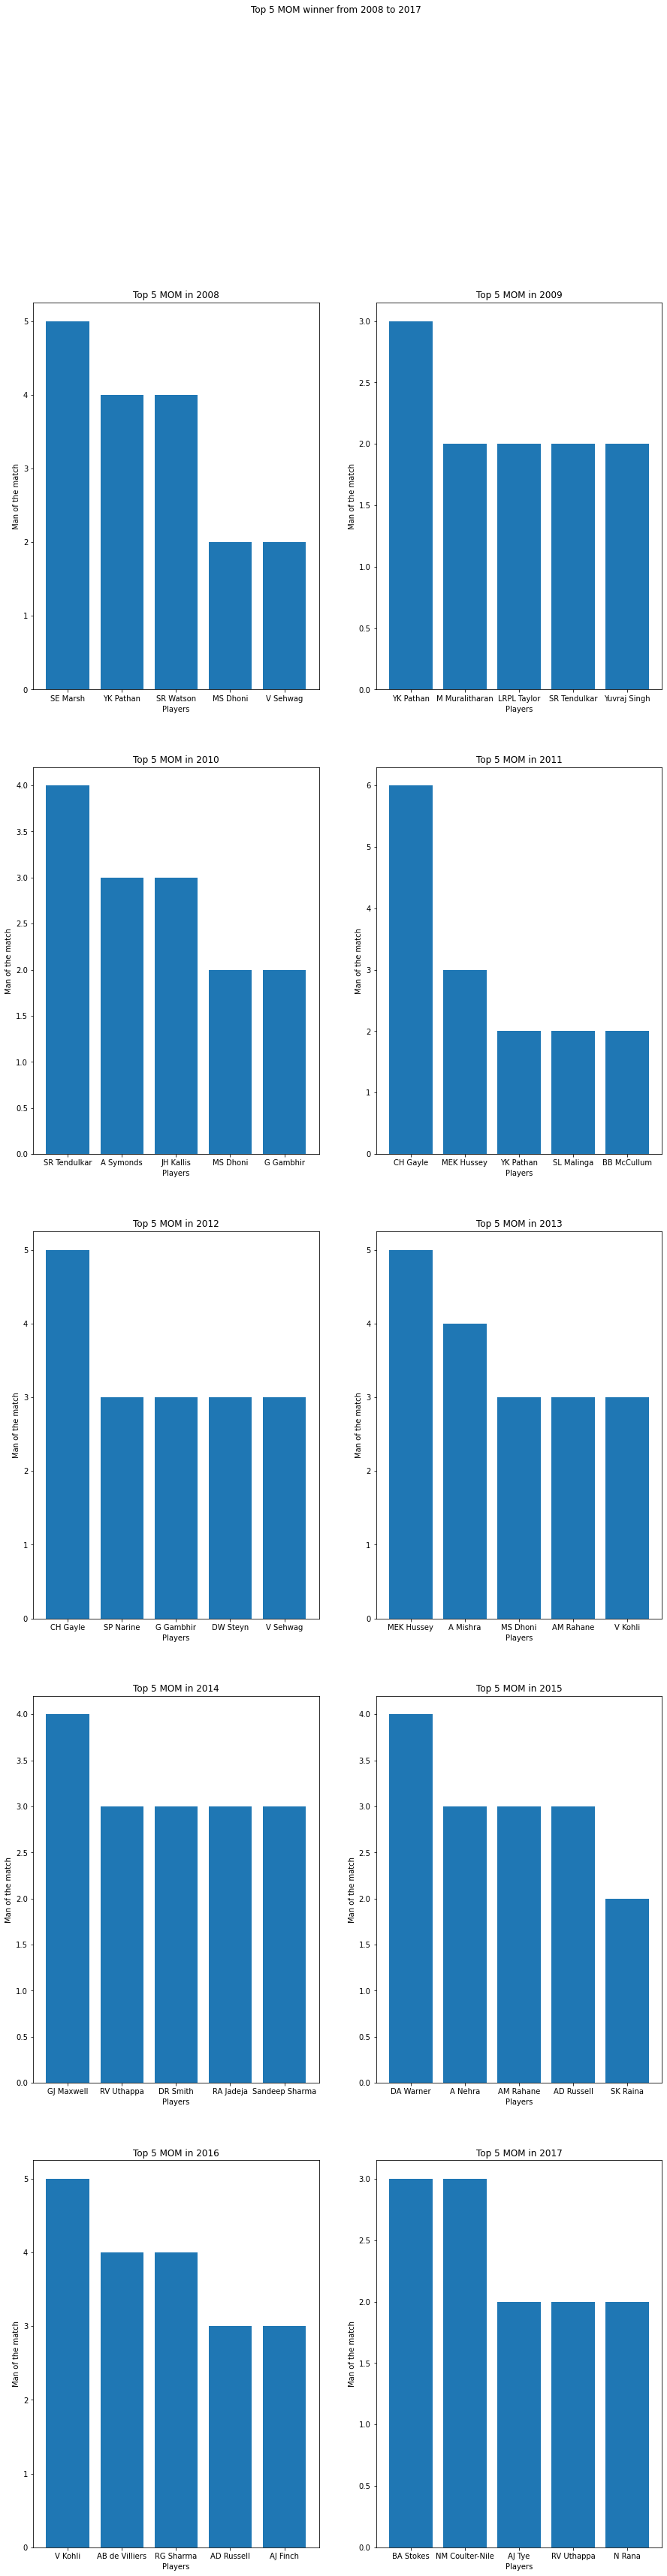

In [304]:
# 8. Top 10 player who won max number of MOM every year

# plot the graph

data_2008 =data[data['season'] == 2008]
data_2009 =data[data['season'] == 2009]
data_2010 =data[data['season'] == 2010]
data_2011 =data[data['season'] == 2011]
data_2012 =data[data['season'] == 2012]
data_2013 =data[data['season'] == 2013]
data_2014 =data[data['season'] == 2014]
data_2015 =data[data['season'] == 2015]
data_2016 =data[data['season'] == 2016]
data_2017 =data[data['season'] == 2017]

x_2008 = data_2008['player_of_match'].value_counts().head(5).index
y_2008 = data_2008['player_of_match'].value_counts().head(5).values

x_2009 = data_2009['player_of_match'].value_counts().head(5).index
y_2009 = data_2009['player_of_match'].value_counts().head(5).values

x_2010 = data_2010['player_of_match'].value_counts().head(5).index
y_2010 = data_2010['player_of_match'].value_counts().head(5).values

x_2011 = data_2011['player_of_match'].value_counts().head(5).index
y_2011 = data_2011['player_of_match'].value_counts().head(5).values

x_2012 = data_2012['player_of_match'].value_counts().head(5).index
y_2012 = data_2012['player_of_match'].value_counts().head(5).values

x_2013 = data_2013['player_of_match'].value_counts().head(5).index
y_2013 = data_2013['player_of_match'].value_counts().head(5).values

x_2014 = data_2014['player_of_match'].value_counts().head(5).index
y_2014 = data_2014['player_of_match'].value_counts().head(5).values

x_2015 = data_2015['player_of_match'].value_counts().head(5).index
y_2015 = data_2015['player_of_match'].value_counts().head(5).values

x_2016 = data_2016['player_of_match'].value_counts().head(5).index
y_2016 = data_2016['player_of_match'].value_counts().head(5).values

x_2017 = data_2017['player_of_match'].value_counts().head(5).index
y_2017 = data_2017['player_of_match'].value_counts().head(5).values


figure = plt.figure(figsize=[15, 55])
figure.suptitle('Top 5 MOM winner from 2008 to 2017 ')

plt.subplot(5,2,1) 
plt.bar(x_2008,y_2008)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2008')

plt.subplot(5,2,2)
plt.bar(x_2009, y_2009)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2009')

plt.subplot(5,2,3)
plt.bar(x_2010,y_2010)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2010')

plt.subplot(5,2,4) 
plt.bar(x_2011, y_2011)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2011')


plt.subplot(5,2,5) 
plt.bar(x_2012,y_2012)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2012')

plt.subplot(5,2,6) 
plt.bar(x_2013, y_2013)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2013')

plt.subplot(5,2,7) 
plt.bar(x_2014,y_2014)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2014')

plt.subplot(5,2,8) 
plt.bar(x_2015, y_2015)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2015')

plt.subplot(5,2,9) 
plt.bar(x_2016,y_2016)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2016')

plt.subplot(5,2,10) 
plt.bar(x_2017, y_2017)
plt.xlabel('Players')
plt.ylabel('Man of the match')
plt.title('Top 5 MOM in 2017')



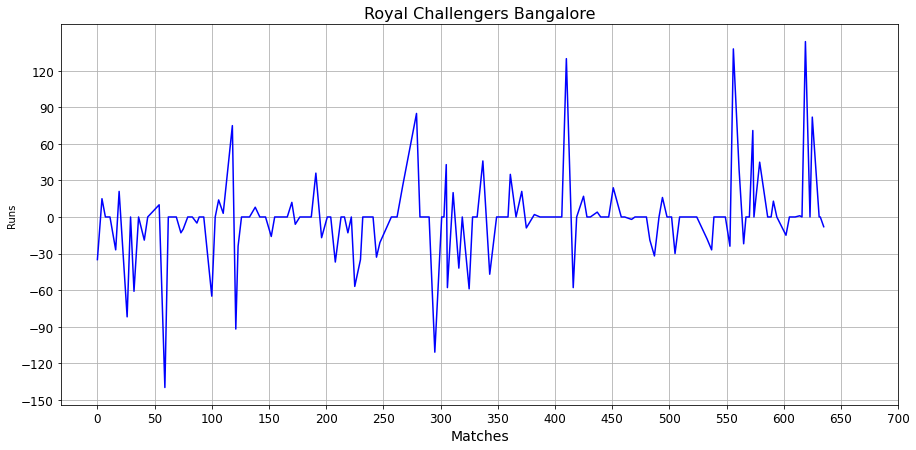

In [181]:
data_winners = data



data_RCB = data_winners[(data_winners['winner'] == 'Royal Challengers Bangalore') | ((data_winners['winner'] != 'Royal Challengers Bangalore') & ( (data_winners['team1'] == 'Royal Challengers Bangalore') | (data_winners['team2'] == 'Royal Challengers Bangalore') ) ) ]
data_RCB['winning_margin'] = np.where(data_RCB['winner'] == 'Royal Challengers Bangalore', data_RCB['win_by_runs'], 0)
data_RCB['winning_margin'] = np.where( (data_RCB['winner'] != 'Royal Challengers Bangalore') & (data_RCB['win_by_runs'] > 0) , -1*data_RCB['win_by_runs'], data_RCB['winning_margin'])

data_values = data_RCB['winning_margin'].unique()
data_values.sort()
data_values



figure = plt.figure(figsize=[15, 7])
data_RCB['winning_margin'].plot.line(color='blue', linestyle='-')
plt.xticks(ticks=np.arange(0, 750, 50), size=12)
plt.yticks(ticks=np.arange(-150, 150, 30), size=12)
plt.xlabel(xlabel='Matches', size=14)
plt.ylabel(ylabel='Runs', size=10)
plt.title(label='Royal Challengers Bangalore', size=16)
plt.grid(b=True)
plt.show()


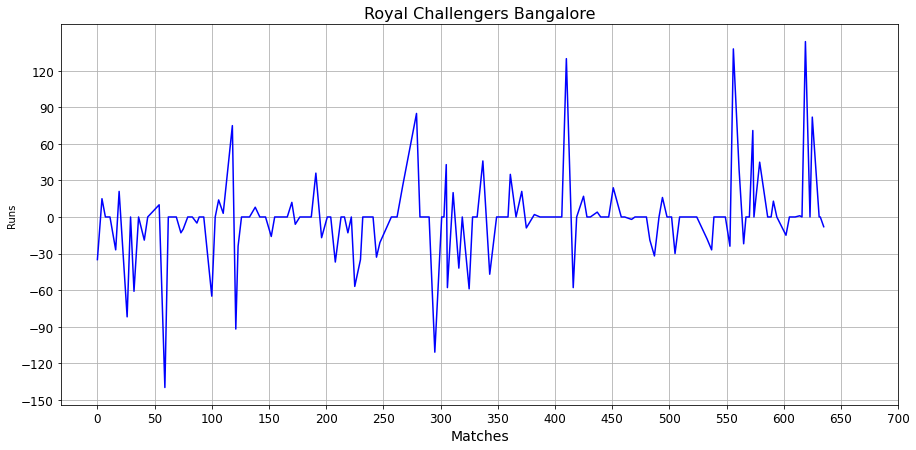

In [214]:
data_winners = data

def plotChartForRunMargin(teamname):
    data_RCB = data_winners[(data_winners['winner'] == teamname) | ((data_winners['winner'] != teamname) & ( (data_winners['team1'] == teamname) | (data_winners['team2'] == teamname) ) ) ]
    data_RCB['winning_margin'] = np.where(data_RCB['winner'] == 'Royal Challengers Bangalore', data_RCB['win_by_runs'], 0)
    data_RCB['winning_margin'] = np.where( (data_RCB['winner'] != 'Royal Challengers Bangalore') & (data_RCB['win_by_runs'] > 0) , -1*data_RCB['win_by_runs'], data_RCB['winning_margin'])

    data_values = data_RCB['winning_margin'].unique()
    data_values.sort()
    data_values



    figure = plt.figure(figsize=[15, 7])
    data_RCB['winning_margin'].plot.line(color='blue', linestyle='-')
    plt.xticks(ticks=np.arange(0, 750, 50), size=12)
    plt.yticks(ticks=np.arange(-150, 150, 30), size=12)
    plt.xlabel(xlabel='Matches', size=14)
    plt.ylabel(ylabel='Runs', size=10)
    plt.title(label='Royal Challengers Bangalore', size=16)
    plt.grid(b=True)
    plt.show()
    pass



plotChartForRunMargin('Royal Challengers Bangalore')


In [264]:
data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

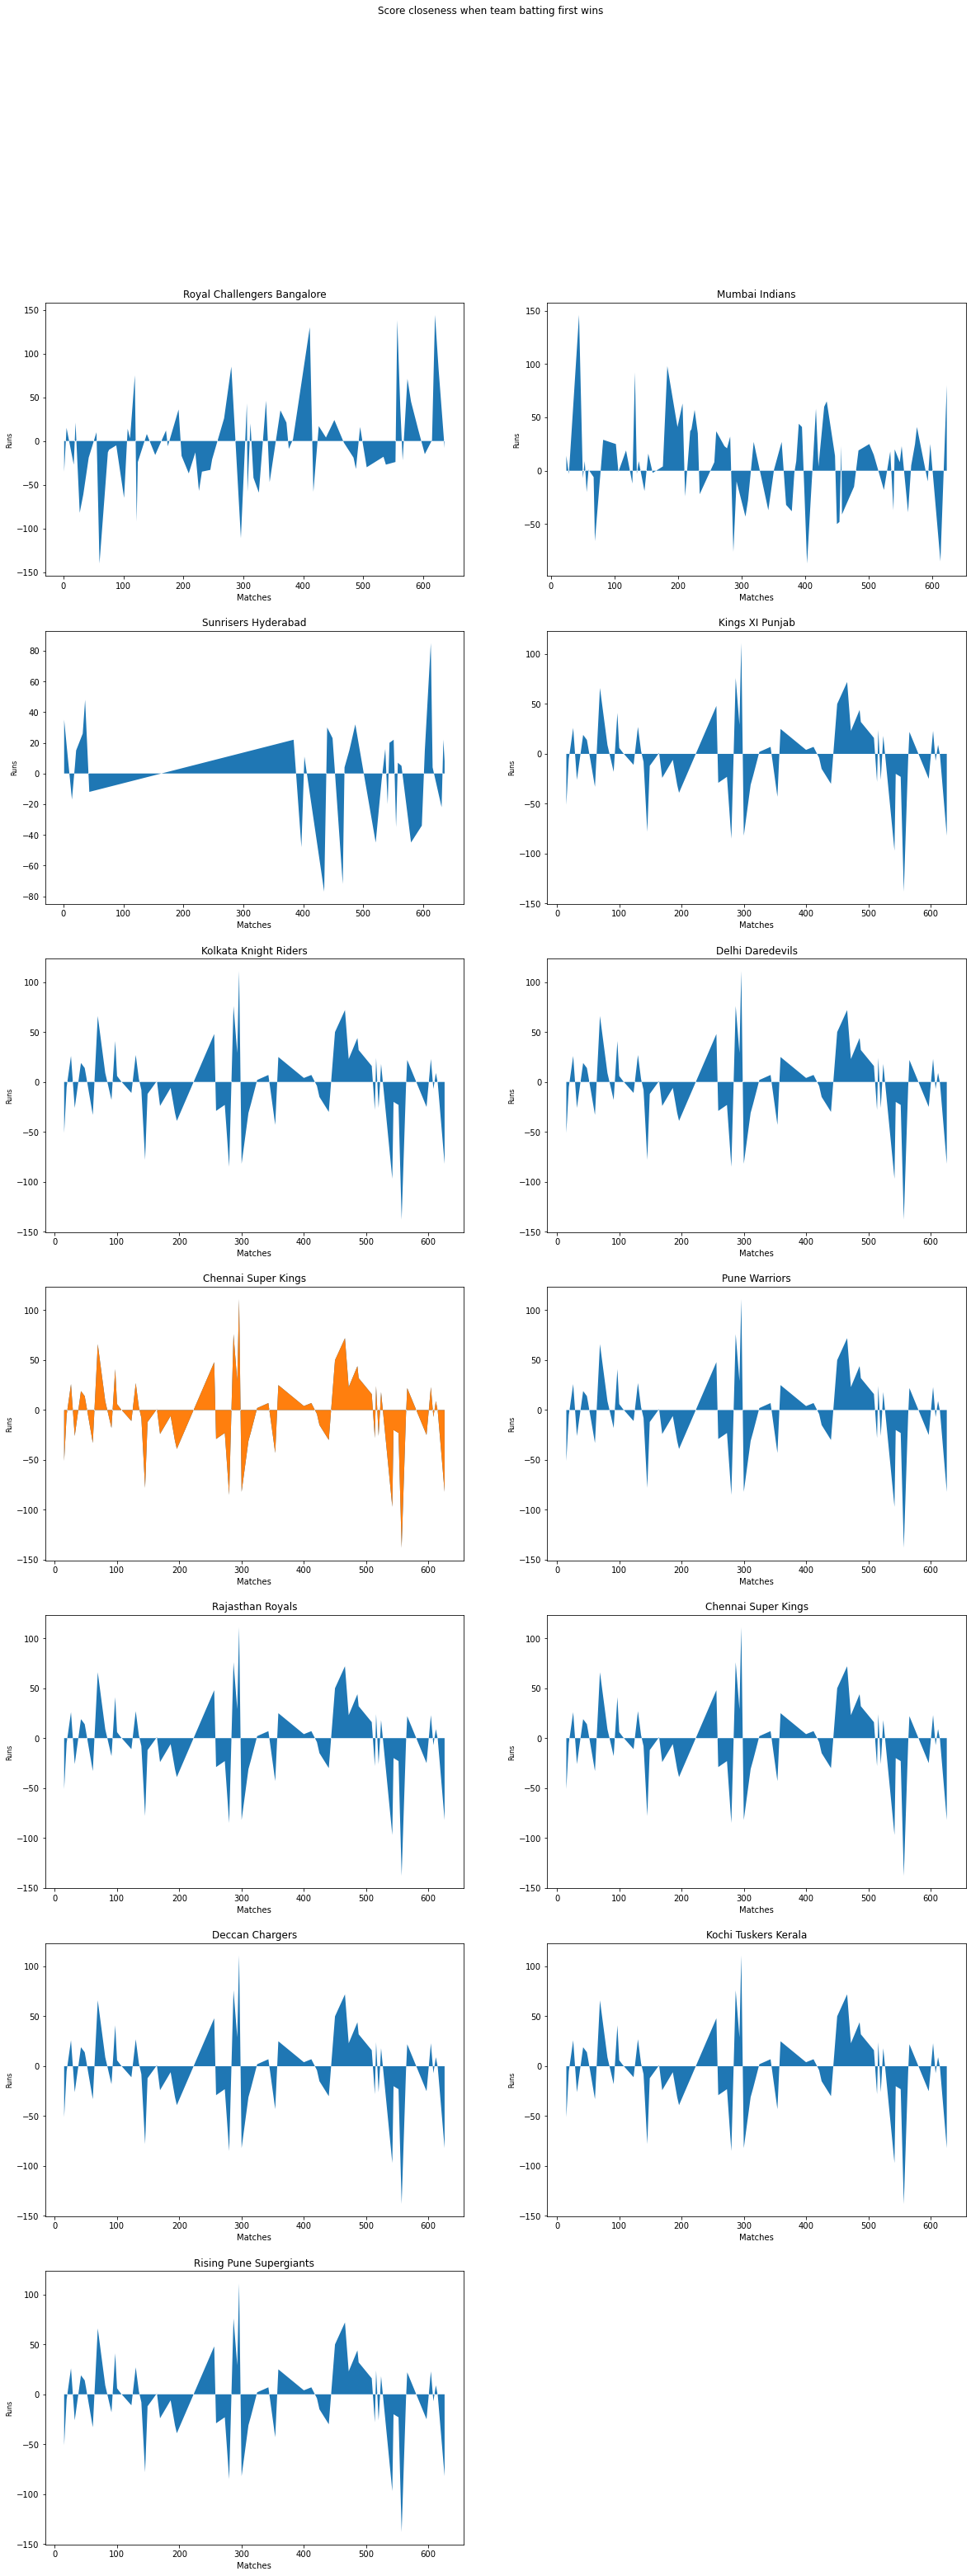

In [302]:
#team = 'Royal Challengers Bangalore'


def plotChartForRunMargin(team):
    data_matches = data[data['win_by_runs'] > 0]
    data_matches['loser'] = np.where(data_matches['winner'] == data_matches['team1'], data_matches['team2'], data_matches['team1'])
    data_team = data_matches[(data_matches['winner'] == team) | (data_matches['loser'] == team)]
    data_team['win_by_runs'] = np.where(data_team['loser'] == team, data_team['win_by_runs'] * -1, data_team['win_by_runs'])
    return data_team

figure = plt.figure(figsize=[20, 50])
figure.suptitle('Score closeness when team batting first wins')

team1 = 'Royal Challengers Bangalore'
data1 = plotChartForRunMargin(team1)
plt.subplot(7,2,1) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team1)
plt.fill_between(data1['id'], data1['win_by_runs'])
#plt.show() 

team2 ='Mumbai Indians'
data2 = plotChartForRunMargin(team2)
plt.subplot(7,2,2) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team2)
plt.fill_between(data2['id'], data2['win_by_runs'])
#plt.show() 

team3 = 'Sunrisers Hyderabad'
data3 = plotChartForRunMargin(team3)
plt.subplot(7,2,3) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team3)
plt.fill_between(data3['id'], data3['win_by_runs'])
#plt.show() 

team4 = 'Kings XI Punjab'
data4 = plotChartForRunMargin(team4)
plt.subplot(7,2,4) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team4)
plt.fill_between(data4['id'], data4['win_by_runs'])

team5 = 'Kolkata Knight Riders'
data5 = plotChartForRunMargin(team4)
plt.subplot(7,2,5) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team5)
plt.fill_between(data5['id'], data5['win_by_runs'])

team6 = 'Delhi Daredevils'
data6 = plotChartForRunMargin(team4)
plt.subplot(7,2,6) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team6)
plt.fill_between(data6['id'], data6['win_by_runs'])

team7 = 'Gujarat Lions'
data7 = plotChartForRunMargin(team4)
plt.subplot(7,2,7) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team6)
plt.fill_between(data7['id'], data7['win_by_runs'])

team7 = 'Chennai Super Kings'
data7 = plotChartForRunMargin(team4)
plt.subplot(7,2,7) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team7)
plt.fill_between(data7['id'], data7['win_by_runs'])

team8 = 'Pune Warriors'
data8 = plotChartForRunMargin(team4)
plt.subplot(7,2,8) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team8)
plt.fill_between(data8['id'], data8['win_by_runs'])

team9 = 'Rajasthan Royals'
data9 = plotChartForRunMargin(team4)
plt.subplot(7,2,9) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team9)
plt.fill_between(data9['id'], data9['win_by_runs'])

team10 = 'Chennai Super Kings'
data10 = plotChartForRunMargin(team4)
plt.subplot(7,2,10) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team10)
plt.fill_between(data10['id'], data10['win_by_runs'])

team11 = 'Deccan Chargers'
data11 = plotChartForRunMargin(team4)
plt.subplot(7,2,11) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team11)
plt.fill_between(data11['id'], data11['win_by_runs'])

team12 = 'Kochi Tuskers Kerala'
data12 = plotChartForRunMargin(team4)
plt.subplot(7,2,12) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team12)
plt.fill_between(data12['id'], data12['win_by_runs'])

team13 = 'Rising Pune Supergiants'
data13 = plotChartForRunMargin(team4)
plt.subplot(7,2,13) 
plt.xlabel(xlabel='Matches', size=10)
plt.ylabel(ylabel='Runs', size=8)
plt.title(team13)
plt.fill_between(data13['id'], data13['win_by_runs'])

plt.show() 







In [6]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,NaN


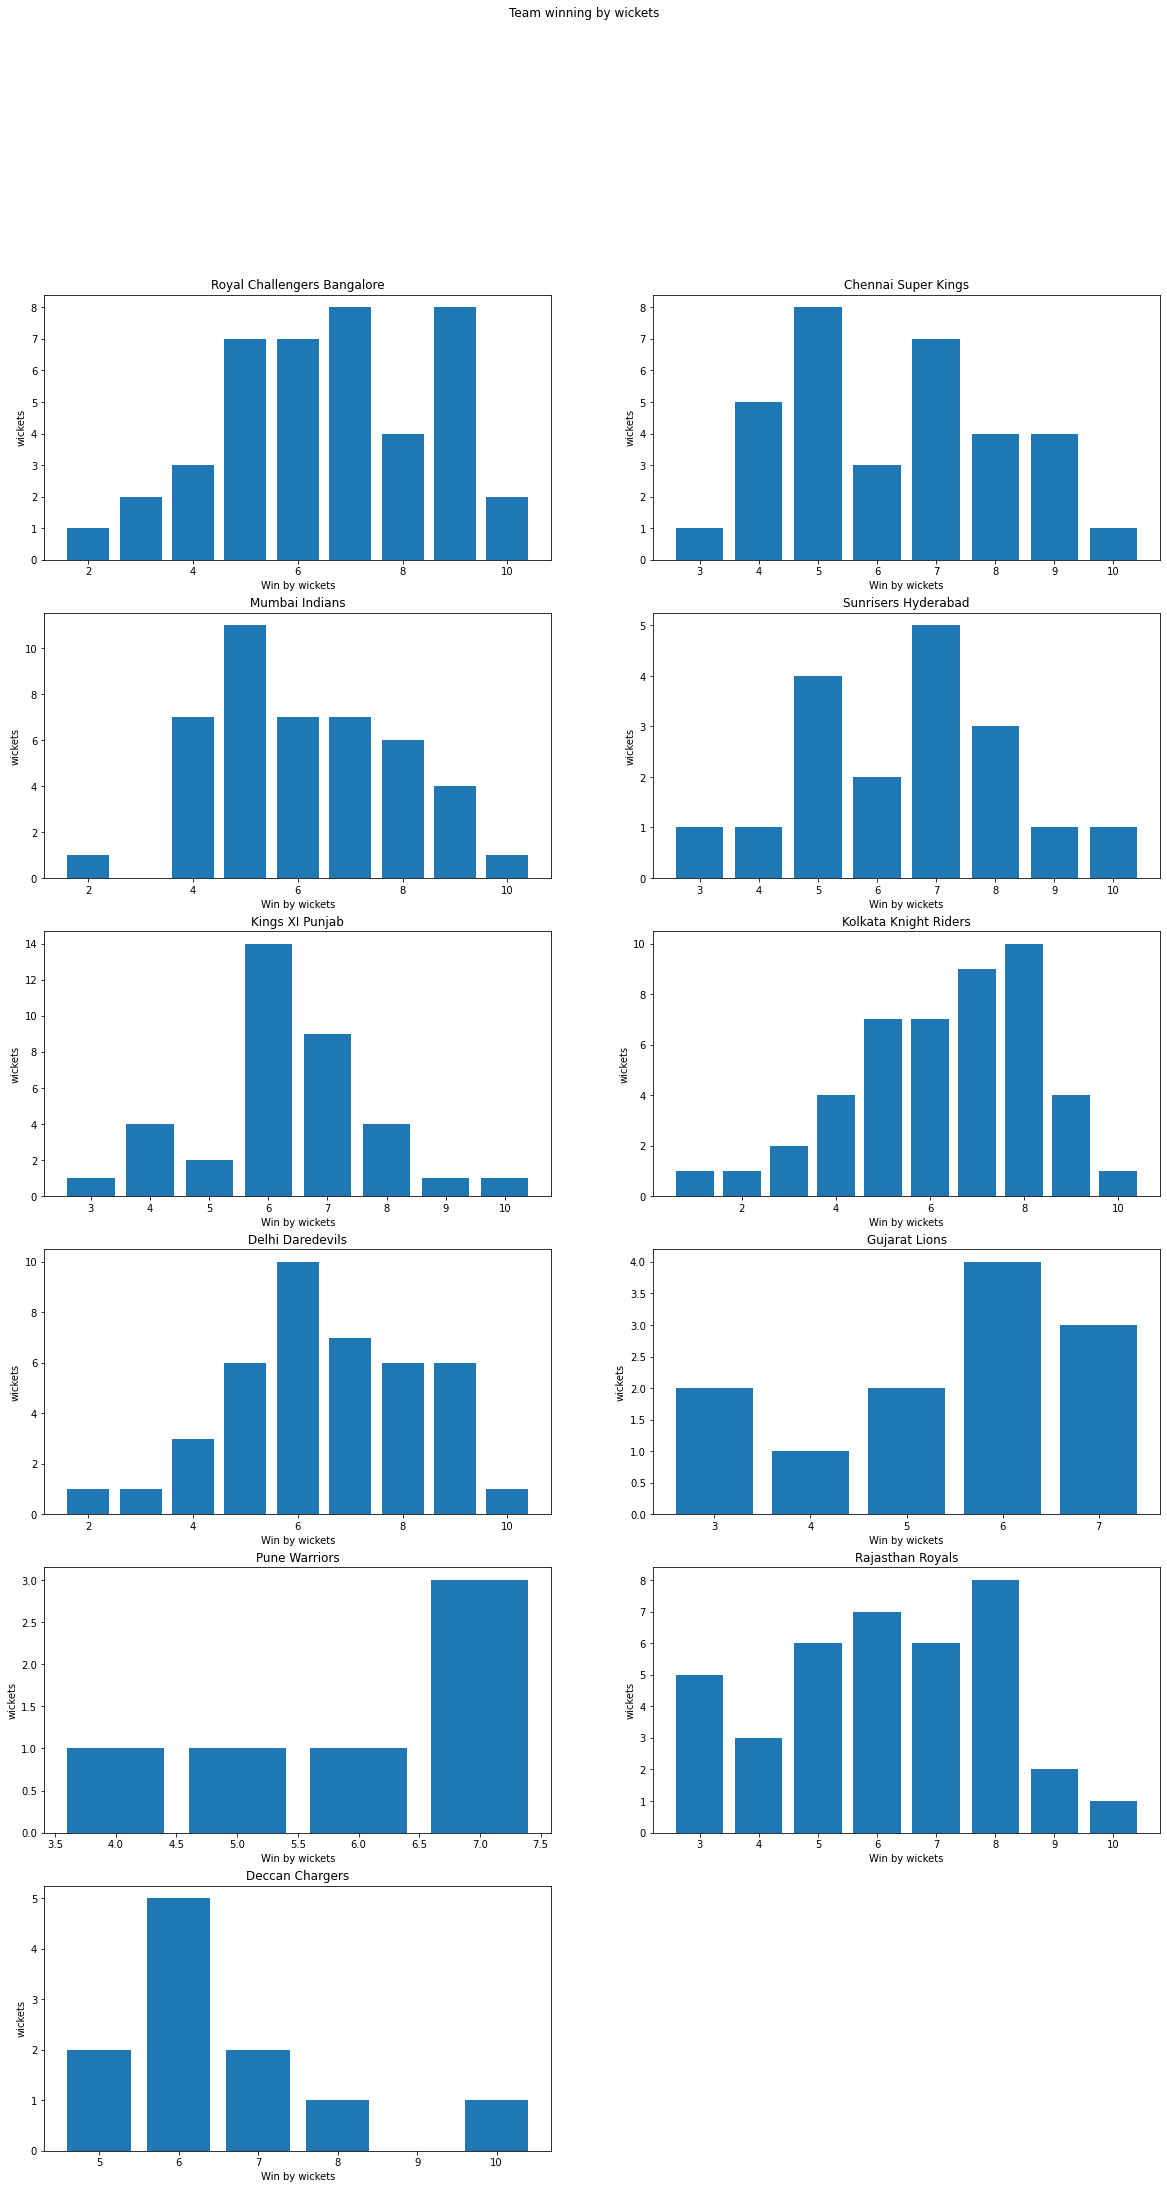

In [79]:
data_new = data
data_new

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [82]:
data['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Abu Dhabi          7
Cape Town          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
East London        3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64

In [83]:
data['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

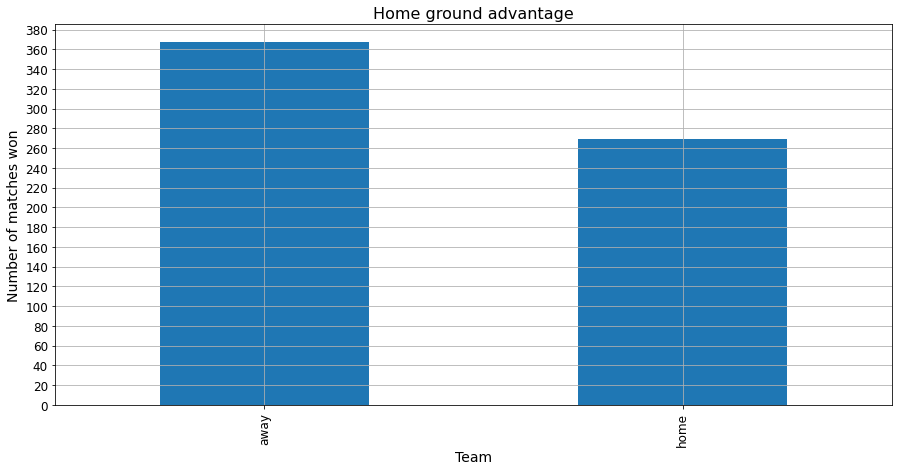

In [163]:
#Setting conditions array with diff city locations
conditions = [
    data_new['city'].eq('Bangalore'),
    data_new['city'].eq('Delhi'),
    data_new['city'].eq('Chennai'),
    data_new['city'].eq('Chandigarh'),
    data_new['city'].eq('Jaipur'),
    data_new['city'].eq('Mumbai'),
    data_new['city'].eq('Kolkata'),
    data_new['city'].eq('Kochi'),
    data_new['city'].eq('Ahmedabad'),
    data_new['city'].eq('Dharamsala'),
    data_new['city'].eq('Rajkot'),
    data_new['city'].eq('Kanpur'),
    data_new['city'].eq('Raipur'),
    data_new['city'].eq('Nagpur'),
    data_new['city'].eq('Indore'),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2008),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2009),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2010),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2011),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2012),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2013),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2014),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2015),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2016),
    data_new['city'].eq('Hyderabad') &  data_new['season'].eq(2017),
    data_new['city'].eq('Visakhapatnam'),
    data_new['city'].eq('Ranchi') &  data_new['season'].eq(2013),
    data_new['city'].eq('Ranchi') &  data_new['season'].eq(2014),
    data_new['city'].eq('Ranchi') &  data_new['season'].eq(2015),
    data_new['city'].eq('Ranchi') &  data_new['season'].eq(2016),
    data_new['city'].eq('Ranchi') &  data_new['season'].eq(2017),
    (data_new['city'].eq('Pune')) &  (data_new['season'] != 2016),
    data_new['city'].eq('Pune') &  data_new['season'].eq(2016)
]

# setting choices based on the conditions defined above
choices = ['Royal Challengers Bangalore','Delhi Daredevils','Chennai Super Kings','Kings XI Punjab','Rajasthan Royals'
          ,'Mumbai Indians', 'Kolkata Knight Riders', 'Kochi Tuskers Kerala', 'Rajasthan Royals', 'Kolkata Knight Riders'
          , 'Gujarat Lions', 'Gujarat Lions', 'Delhi Daredevils', 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Deccan Chargers'
          , 'Deccan Chargers', 'Deccan Chargers', 'Deccan Chargers', 'Deccan Chargers'
          , 'Sunrisers Hyderabad', 'Sunrisers Hyderabad', 'Sunrisers Hyderabad', 'Sunrisers Hyderabad', 'Sunrisers Hyderabad'
          , 'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Chennai Super Kings', 'Chennai Super Kings'
          , 'Chennai Super Kings', 'Pune Warriors', 'Rising Pune Supergiants']

# Applying conditions and choices to set up HomeTeam value 
data_new['hometeam'] = np.select(conditions, choices, default=0)

# new column named 'hostwin' as host when hometeam is same as winner or away when hometeam is not same as winner
data_new['hostwin'] = np.where(data_new['winner'] == data_new['hometeam'], 'home', 'away')

# Plt the graph
figure = plt.figure(figsize=[15, 7])
data_new['hostwin'].value_counts().plot.bar()
plt.xticks(size=12)
plt.yticks(ticks=np.arange(0, 400, 20), size=12)
plt.xlabel(xlabel='Team', size=14)
plt.ylabel(ylabel='Number of matches won', size=14)
plt.title(label='Home ground advantage', size=16)
plt.grid(b=True)
plt.show()